## TP1 : Linear regression

Les imports :

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import statsmodels.api as sm
from scipy.stats import t
from scipy import stats
from sklearn.linear_model import LinearRegression





1.Import the data from the file “invest.txt” and print them in a readable form, e.g. a table containing first 5 observations.


In [13]:
# Read the data from the file
df = pd.read_csv("invest.txt", sep=' ')
print(df.head(5))

   year     gnp  invest     cpi  interest
0  1968   873.4   133.3   82.54      5.16
1  1969   944.0   149.3   86.79      5.87
2  1970   992.7   144.2   91.45      5.95
3  1971  1077.6   166.4   96.01      4.88
4  1972  1185.9   195.0  100.00      4.50


2.Plot the data with Gross National Product (GNP, column “gnp”) being the abscissa and Investment (column “invest”) being the ordinate.



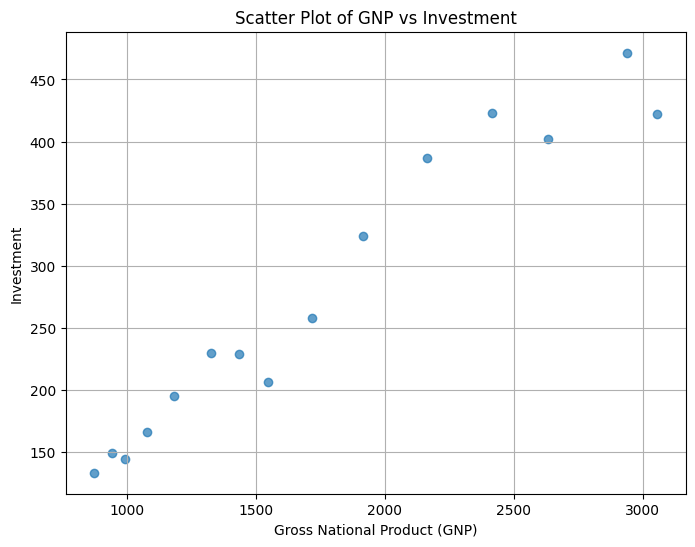

In [14]:
# Plotting GNP vs Investment
plt.figure(figsize=(8, 6))
plt.scatter(df["gnp"], df["invest"], alpha=0.7)
plt.title('Scatter Plot of GNP vs Investment')
plt.xlabel('Gross National Product (GNP)')
plt.ylabel('Investment')
plt.grid(True)
plt.show()

In [19]:
# Logarithm transformation for GNP and Investment columns
df['log_gnp'] = df['gnp'].apply(lambda x: math.log(x))
df['log_invest'] = df['invest'].apply(lambda x: math.log(x))
df.head(5)

,year,gnp,invest,cpi,interest,log_gnp,log_invest
0,1968,873.4,133.3,82.54,5.16,6.772394,4.892602
1,1969,944.0,149.3,86.79,5.87,6.850126,5.005958
2,1970,992.7,144.2,91.45,5.95,6.900429,4.971201
3,1971,1077.6,166.4,96.01,4.88,6.982492,5.114395
4,1972,1185.9,195.0,100.00,4.50,7.078257,5.273000


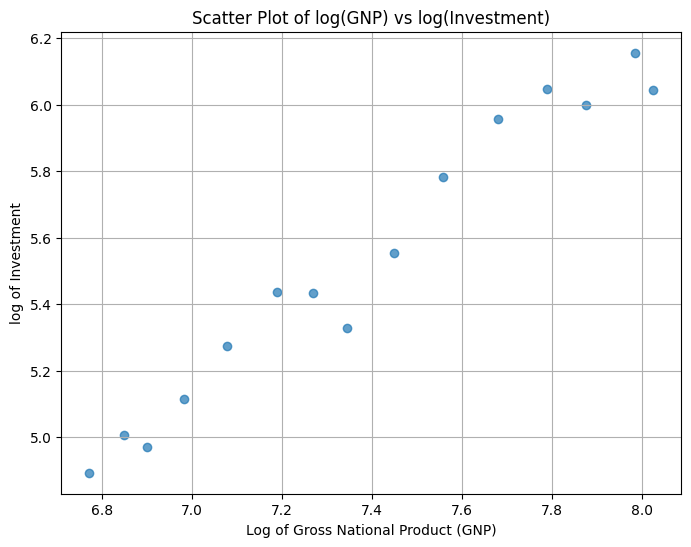

In [20]:
# Plotting log(GNP) vs log(Investment)
plt.figure(figsize=(8, 6))
plt.scatter(df["log_gnp"], df["log_invest"], alpha=0.7)
plt.title('Scatter Plot of log(GNP) vs log(Investment)')
plt.xlabel('Log of Gross National Product (GNP)')
plt.ylabel('log of Investment')
plt.grid(True)
plt.show()

3. For the linear regression of Investment on GNP, estimate the intercept and the slope and their standard deviations, as well as the determination coefficient for the ordinary least squares. Output them in a readable form.

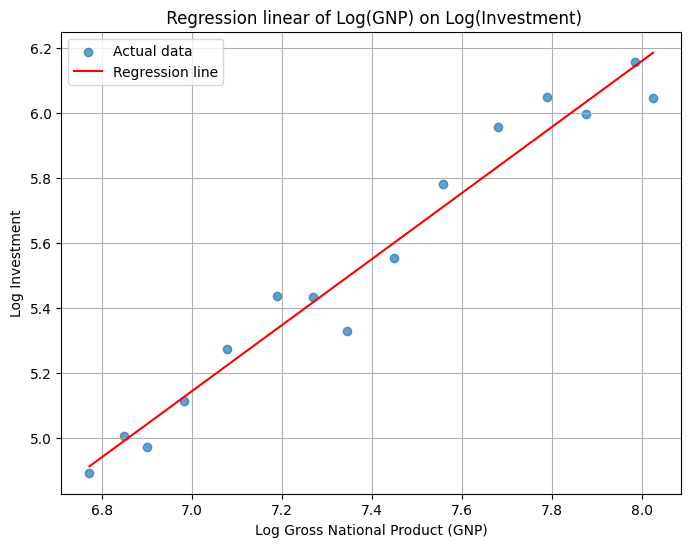

c:\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     336.1
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.14e-10
Time:                        09:37:37   Log-Likelihood:                 16.311
No. Observations:                  15   AIC:                            -28.62
Df Residuals:                      13   BIC:                            -27.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9636      0.410     -4.795      0.0

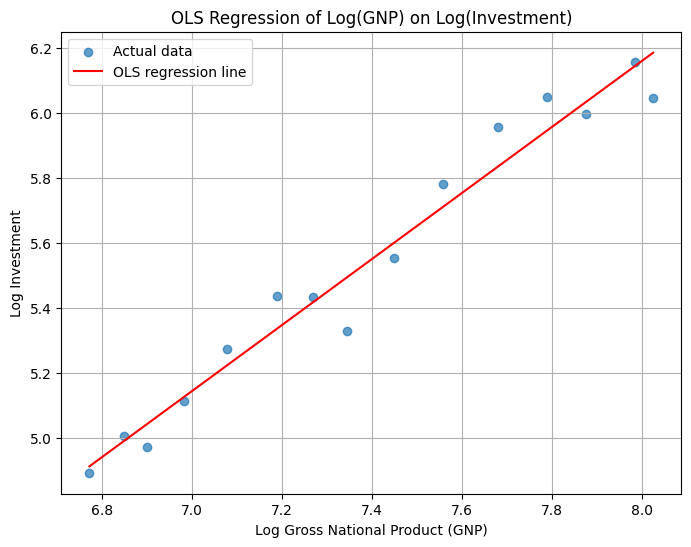

In [35]:
# Calculate means of log-transformed columns
mean_log_gnp = df['log_gnp'].mean()
mean_log_invest = df['log_invest'].mean()

# Calculate the regression coefficients beta_0 and beta_1
numerator = ((df['log_gnp'] - mean_log_gnp) * (df['log_invest'] - mean_log_invest)).sum()
denominator = ((df['log_gnp'] - mean_log_gnp) ** 2).sum()

# Calculate the slope and intercept
beta_1 = numerator / denominator
beta_0 = mean_log_invest - (beta_1 * mean_log_gnp)

# Calculate the predicted log_invest values
df['predicted_log_invest'] = beta_0 + beta_1 * df['log_gnp']

# Scatter plot of log-transformed GNP vs log-transformed Investment
plt.figure(figsize=(8, 6))
plt.scatter(df['log_gnp'], df['log_invest'], label='Actual data', alpha=0.7)

# Plotting the regression line
plt.plot(df['log_gnp'], df['predicted_log_invest'], color='red', label='Regression line')
plt.title(' Regression linear of Log(GNP) on Log(Investment)')
plt.xlabel('Log Gross National Product (GNP)')
plt.ylabel('Log Investment')
plt.legend()
plt.grid(True)
plt.show()

#OLS MODEL TO COMPARE WITH THE PREVIOUS RESULTS 
log_invest = df['log_invest'].values
log_gnp= df['log_gnp'].values
y= log_invest
s = np.shape(log_invest)
const = np.ones(s)

# Creating the matrix X 
X1 = np.column_stack((const, log_gnp ))
n,k = X1.shape

# Initializing the Ordinary Least Squares (OLS) linear regression model with the dependent variable y and the matrix X1
model = sm.OLS(y, X1)
# Fitting the model to the data
results = model.fit()

# Print the regression summary
print(results.summary())

# Predicted values from the model
predicted_values = results.predict()

# Plotting the actual data against the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(log_gnp, log_invest, label='Actual data', alpha=0.7)
plt.plot(log_gnp, predicted_values, color='red', label='OLS regression line')
plt.title('OLS Regression of Log(GNP) on Log(Investment)')
plt.xlabel('Log Gross National Product (GNP)')
plt.ylabel('Log Investment')
plt.legend()
plt.grid(True)
plt.show()




4. Test the significance of the slope using the Student-t test. Report the value of the test statistic and the p-value.

In [44]:
# Get the test statistic and p-value from the test result
t_statistic = 1.0153 / 0.055
print("t-statistic:", t_statistic)

# Degrees of freedom (n - k)
degrees_of_freedom = n - k
print(n-k)
p_value= ( 1- stats.t.cdf(abs(t_statistic), degrees_of_freedom) ) *2
print(p_value)

#Set the significance level
alpha = 0.01
# Perform the hypothesis test using the p-value
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis (restrictions).")





t-statistic: 18.46
13
1.0413314655011163e-10
Reject the null hypothesis.


5.For the GNP value 1000, estimate the necessary Investment, provide confidence and prediction intervals for the 90% level

In [81]:
# GNP value for prediction
gnp_value = 1000

# Log-transform the GNP value
log_gnp_value = math.log(gnp_value)

# Calculate the predicted log_invest value using the regression model
predicted_log_invest_value = beta_0 + beta_1 * log_gnp_value

# Calculate the unbiased estimator for the residual variance (sigma^2)
residuals = log_invest - predicted_values
n = len(residuals)
sum_squared_residuals = np.sum(residuals**2)
sigma_hat_squared = sum_squared_residuals / (n - 2)

# Calculate the standard error of the predicted log_invest value
standard_error_confiance = math.sqrt(sigma_hat_squared * (1/n + (log_gnp_value - mean_log_gnp)**2 / denominator))
standard_error_prediction = math.sqrt(sigma_hat_squared * (1+1/n + (log_gnp_value - mean_log_gnp)**2 / denominator))

# Calculate the t-value for the 95% confidence interval
t_value = t.ppf(0.975, degrees_of_freedom)


# Calculate the confidence interval for the predicted log_invest value
confidence_interval = (predicted_log_invest_value - t_value * standard_error_confiance, predicted_log_invest_value + t_value * standard_error_confiance)

# Calculate the prediction interval for the log_invest value
prediction_interval = (predicted_log_invest_value - t_value * standard_error_prediction , predicted_log_invest_value + t_value * standard_error_prediction)

# Convert the predicted log_invest value, confidence interval, and prediction interval back to the original scale
predicted_invest_value = math.exp(predicted_log_invest_value)
confidence_interval = (math.exp(confidence_interval[0]), math.exp(confidence_interval[1]))
prediction_interval = (math.exp(prediction_interval[0]), math.exp(prediction_interval[1]))

# Print the results
print("Estimated Investment for GNP value of 1000:", predicted_invest_value)
print("90% Confidence Interval:", confidence_interval)
print("90% Prediction Interval:", prediction_interval)




Estimated Investment for GNP value of 1000: 155.97942793105494
90% Confidence Interval: (144.70518577278824, 168.1320666413486)
90% Prediction Interval: (127.24535487814856, 191.20212255290116)


6. On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the estimated regression line, the confidence and prediction intervals for all values of log(GNP) between its minimum and maximum in the data set.


TypeError: tuple indices must be integers or slices, not tuple

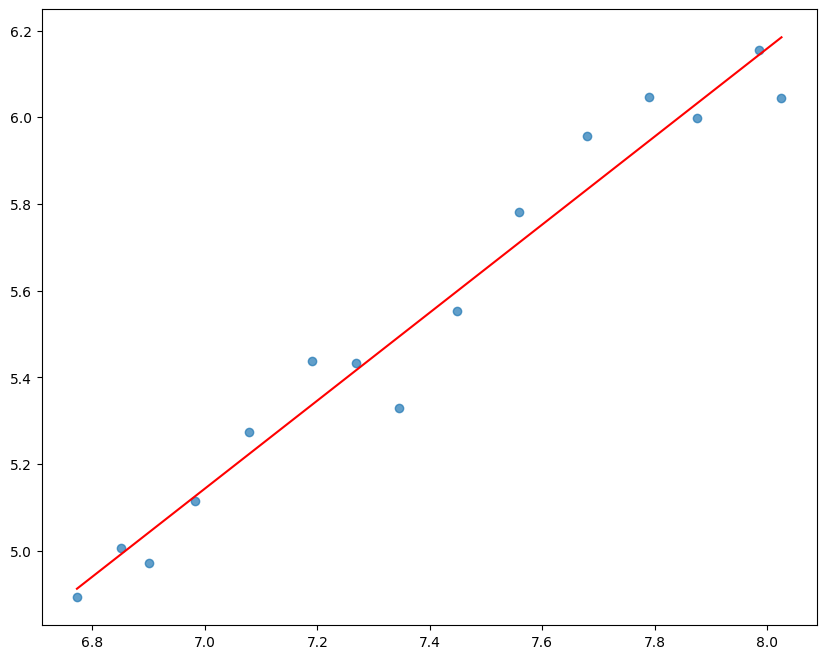

In [89]:
# Récupération des valeurs minimales et maximales de log(GNP)
min_log_gnp = df['log_gnp'].min()
max_log_gnp = df['log_gnp'].max()

# Création d'une séquence de valeurs pour log(GNP) entre le minimum et le maximum
log_gnp_values = np.linspace(min_log_gnp, max_log_gnp, num=100)

# Calcul des prédictions pour ces valeurs de log(GNP)
predicted_log_invest_values = beta_0 + beta_1 * log_gnp_values

# Calcul des intervalles de confiance et de prédiction pour ces valeurs de log(GNP)
conf_interval = []
pred_interval = []
for log_gnp_val in log_gnp_values:
    std_error_conf = math.sqrt(sigma_hat_squared * (1/n + (log_gnp_val - mean_log_gnp)**2 / denominator))
    std_error_pred = math.sqrt(sigma_hat_squared * (1 + 1/n + (log_gnp_val - mean_log_gnp)**2 / denominator))

    # Calculate the t-value for the 90% confidence interval
    t_value_conf = stats.t.ppf(0.95, n - 2)
    # Calculate the t-value for the 90% prediction interval
    t_value_pred = stats.t.ppf(0.95, n - 2)

    # Calculate the confidence interval for the predicted log_invest value
    confidence_interval = (beta_0 + beta_1 * log_gnp_val - t_value_conf * std_error_conf,
                           beta_0 + beta_1 * log_gnp_val + t_value_conf * std_error_conf)
    conf_interval.append(confidence_interval)

    # Calculate the prediction interval for the log_invest value
    prediction_interval = (beta_0 + beta_1 * log_gnp_val - t_value_pred * std_error_pred,
                           beta_0 + beta_1 * log_gnp_val + t_value_pred * std_error_pred)
    pred_interval.append(prediction_interval)

# Convertir les listes en tableaux NumPy
conf_interval = np.array(conf_interval)
pred_interval = np.array(pred_interval)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(df['log_gnp'], df['log_invest'], label='Data', alpha=0.7)
plt.plot(log_gnp_values, predicted_log_invest_values, color='red', label='Regression line')
plt.fill_between(log_gnp_values, conf_interval[:, 0], conf_interval[:, 1], color='blue', alpha=0.2, label='Confidence interval')
plt.fill_between(log_gnp_values, pred_interval[:, 0], pred_interval[:, 1], color='green', alpha=0.2, label='Prediction interval')
plt.xlabel('Log Gross National Product (GNP)')
plt.ylabel('Log Investment')
plt.title('Log(GNP) vs Log(Investment) with Regression Line and Intervals')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


# Récupération des valeurs minimales et maximales de log(GNP)
min_log_gnp = df['log_gnp'].min()
max_log_gnp = df['log_gnp'].max()

# Création d'une séquence de valeurs pour log(GNP) entre le minimum et le maximum
log_gnp_values = np.linspace(min_log_gnp, max_log_gnp, num=100)

# Calcul des prédictions pour ces valeurs de log(GNP)
predicted_log_invest_values = beta_0 + beta_1 * log_gnp_values

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(df['log_gnp'], df['log_invest'], label='Data', alpha=0.7)
plt.plot(log_gnp_values, predicted_log_invest_values, color='red', label='Regression line')
plt.fill_between(log_gnp_values, confidence_interval[:, 0], confidence_interval[:, 1], color='blue', alpha=0.2, label='Confidence interval')
plt.fill_between(log_gnp_values, prediction_interval[:, 0], prediction_interval[:, 1], color='green', alpha=0.2, label='Prediction interval')
plt.xlabel('Log Gross National Product (GNP)')
plt.ylabel('Log Investment')
plt.title('Log(GNP) vs Log(Investment) with Regression Line and Intervals')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()




7. Estimate the intercept, the slope, and the determination coefficient and predict the necessary Investment for the GNP value 1000 using existing functionality. The class LinearRegression() from sklearn.linear_model is suggested but not obligatory ; any other available implementation of the linear regression can be used instead. Report the estimated values and make sure that those calculated ‘by hand’ (Steps 3 and 5) coincide with the ones obtained using existing implementation.


In [80]:
# Initialize a LinearRegression model
model_sklearn = LinearRegression()

# Prepare the data for sklearn LinearRegression
X_sklearn = df[['log_gnp']]  # Assuming 'gnp' and 'invest' are the column names in your DataFrame
y_sklearn = df['log_invest']

# Fit the sklearn model to the data
model_sklearn.fit(X_sklearn, y_sklearn)

# Get the intercept and slope from sklearn LinearRegression
intercept_sklearn = model_sklearn.intercept_
slope_sklearn = model_sklearn.coef_[0]


# Predict the necessary Investment for GNP value 1000 using sklearn
gnp_value = [[math.log(1000)]]  # Value for prediction
investment_prediction_sklearn = model_sklearn.predict(gnp_value)

# Print the results obtained using sklearn
print("Results using sklearn LinearRegression:")
print(f"Intercept: {intercept_sklearn}")
print(f"Slope: {slope_sklearn}")
print(f"Predicted Investment for GNP 1000: {math.exp(investment_prediction_sklearn[0])}")



Results using sklearn LinearRegression:
Intercept: -1.9635913352301833
Slope: 1.0152814015988711
Predicted Investment for GNP 1000: 155.97942793105494


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6.On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the estimated regression line, the confidence and prediction intervals for all values of log(GNP) between its minimum and maximum in the data set.